In [1]:
import pandas as pd
from WineDataExplorerPackage import *
from WineDataExplorerPackage import descriptive_statistics as ds
from WineDataExplorerPackage import plots as pl

red_wine_df = read_data_to_dataframe("data/winequality-red.xlsx", winetype="red")
white_wine_df = read_data_to_dataframe("data/winequality-white.xlsx", winetype="white")
combined_wine_df = combine_dataframes([red_wine_df, white_wine_df])

/Users/andy/cphDAT/BI/dat4bi-mp2/dat4bi-mp2/WineDataExplorerPackage/plots.py:277: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].max()


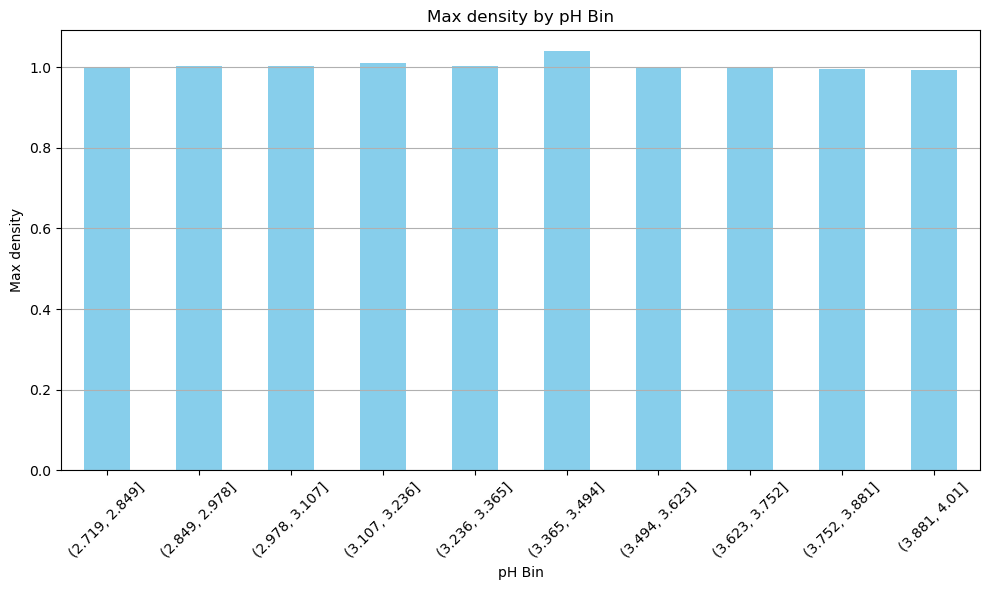

bin
(2.719, 2.849]    0.99960
(2.849, 2.978]    1.00320
(2.978, 3.107]    1.00295
(3.107, 3.236]    1.01030
(3.236, 3.365]    1.00260
(3.365, 3.494]    1.03898
(3.494, 3.623]    1.00040
(3.623, 3.752]    0.99940
(3.752, 3.881]    0.99590
(3.881, 4.01]     0.99340
Name: density, dtype: float64

In [2]:
pl.show_binned_data(combined_wine_df, 10, 'pH', 'density', 'max')

<Axes: title={'center': 'Maximum Density by pH Bin'}, xlabel='pH Bin', ylabel='Max Density'>

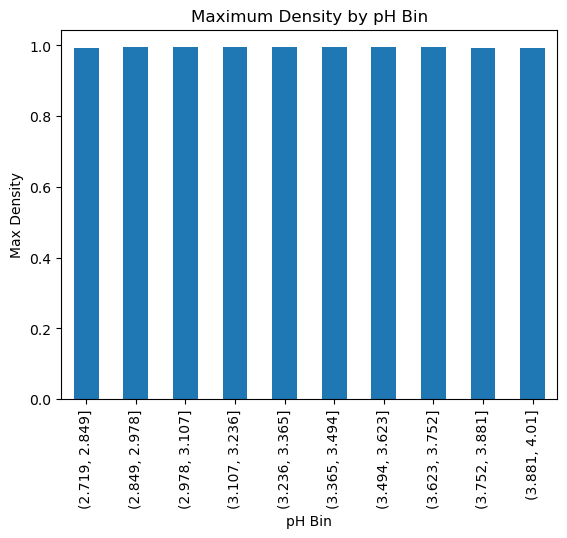

In [3]:
ph_density_df = combined_wine_df[['pH', 'density']]
pd.options.mode.copy_on_write = True
ph_density_df['pH_bin'] = pd.cut(ph_density_df['pH'], bins=10)
ph_density_df = ph_density_df[['pH_bin', 'density']]
max_density_by_ph_bin = ph_density_df.groupby('pH_bin', observed=True)['density'].mean()
max_density_by_ph_bin.plot(kind='bar', xlabel='pH Bin', ylabel='Max Density', title='Maximum Density by pH Bin')

In [4]:
#ph_density_df.groupby('pH_bin', observed=True).max()

<Axes: title={'center': 'Maximum Density by pH Bin'}, xlabel='pH Bin', ylabel='Max Density'>

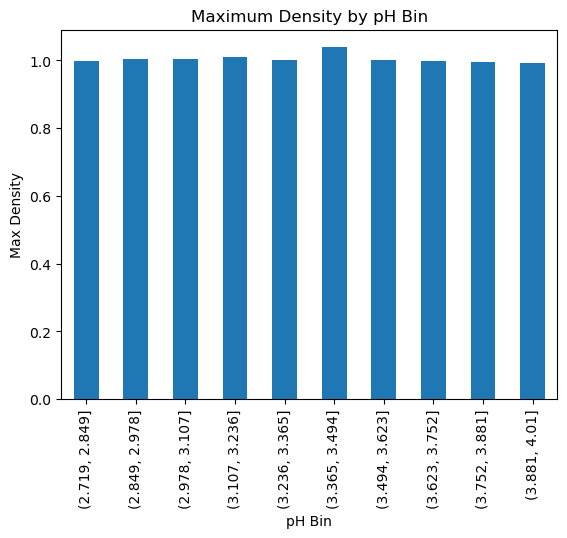

In [5]:
max_density_by_ph_bin = ph_density_df.groupby('pH_bin', observed=True)['density'].max()
max_density_by_ph_bin.plot(kind='bar', xlabel='pH Bin', ylabel='Max Density', title='Maximum Density by pH Bin')

In [6]:
ph_density_df

,pH_bin,density
0,"(3.494, 3.623]",0.99780
1,"(3.107, 3.236]",0.99680
2,"(3.236, 3.365]",0.99700
3,"(3.107, 3.236]",0.99800
4,"(3.494, 3.623]",0.99780
...,...,...
6492,"(3.236, 3.365]",0.99114
6493,"(3.107, 3.236]",0.99490
6494,"(2.978, 3.107]",0.99254
6495,"(3.236, 3.365]",0.98869
